In [68]:
import eds 
import simpy
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import show as sh

In [69]:
clear all

In [70]:
df=pd.read_csv('Prepro/Test-Data',index_col='Unnamed: 0')

sectors=df['PCI Serving'].unique()
cluster=[775,133]

In [71]:
sectors=df['PCI Serving'].unique()

In [72]:
cluster=[775,133]

In [75]:
max_prb=50
ue_nr=10


size=4000
env=simpy.Environment()
ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
ue_dict_red2,ue_all=eds.get_user_from_cluster_random(ue_dict,cluster,ue_nr)

In [77]:
load1_l=np.array([])
load2_l=np.array([])
speicher={}
ran=np.arange(1,40,1)
metric=[1,1]
prb_number_comp=eds.calculate_prb_number2(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp
for k in ran:
    env=simpy.Environment()
    sched1=eds.sched_inst(env)
    sched2=eds.sched_inst(env)
    sched3=eds.sched_inst(env)
    sched_l=[sched1,sched2]
    

    ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
    ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster,ue_nr)
    
    env=simpy.Environment()
    #Start processes

    SCHEDULE_T=2 #Clock des Schedulers 
    for i in cluster:
        ue_list=ue_dict_red2[i]
        for j in ue_list:
            env.process(j.best_effort_stat(env,k))

    ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
    for i in cluster:
        ue_list=ue_dict_red2[i]
        new_ue_list=np.array([])
        for j in ue_list:
            if(j.comp == 0):
                new_ue_list=np.append(new_ue_list,j)
            else:
                ue_comp=np.append(ue_comp,j)
        ue_dict[i]=new_ue_list #user without comp

    env.process(sched3.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

    counter=0
    for i in cluster:
        ue_list=ue_dict[i]
        ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
        sched=sched_l[counter]
        env.process(sched.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
        counter=counter+1
    timer=10000
    env.run(until=timer)
    liste=np.array([])
    
    av=0
    for i in ue_all:
        liste=np.append(liste,((i.mR2/i.mR)-1)*100)
        av+=i.mR2/i.mR
    av=av/(ue_nr*2)
    speicher.update({k:liste})
    
    rem1=0
    req1=0
    load1=0
    rem2=0
    req2=0
    load2=0
    ind=int(timer/2-2)
    for i in np.arange(100,ind):
        rem1+=sched1.rem_prb[ind]
        req1+=sched1.rem_req[ind]
        load1+=(sched1.rem_req[ind]+(max_prb-sched1.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
        rem2+=sched2.rem_prb[ind]
        req2+=sched2.rem_req[ind]
        load2+=(sched2.rem_req[ind]+(max_prb-sched2.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
    load1_l=np.append(load1_l,load1/len(np.arange(100,ind)))
    load2_l=np.append(load2_l,load2/len(np.arange(100,ind)))
    
    

C:\Users\Caroline Zoll\EDS\eds.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


KeyboardInterrupt: 

In [ ]:
l=np.array([])
l2=np.array([])
for i in ran:
    x=speicher.get(i)
    m=x[0:ue_nr].mean()
    m2=x[ue_nr:ue_nr*2].mean()
    l=np.append(l,m)
    l2=np.append(l2,m2)
min_val=min(np.append(load1_l,load2_l))
max_val=max(np.append(load1_l,load2_l))

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(ran,l,label=str(i*100/max_prb)+'% of prbs for comp')
#plt.axvline(x=ran[14], color='red', label='full load of the cell')
plt.xlabel('Av. packet arrival [ms]')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')


In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(ran,l2,label='cell1',color='orange')
plt.xlabel('Av. packet arrival [ms]')
plt.title('Comparison of both cells in the cluster with 62% of the prbs for comp')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')


In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(ran,(l+l2)/,label='cell1',color='orange')
plt.xlabel('Av. packet arrival [ms]')
plt.title('Comparison of both cells in the cluster with 62% of the prbs for comp')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')


In [88]:
load1_l=np.array([])
load2_l=np.array([])
speicher={}
k=4
metric=[1,1]
prb_number_comp=eds.calculate_prb_number2(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp
env=simpy.Environment()
sched1=eds.sched_inst(env)
sched2=eds.sched_inst(env)
sched3=eds.sched_inst(env)
sched_l=[sched1,sched2]
    

ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
ue_dict_red2,ue_all=eds.get_user_from_cluster_random(ue_dict,cluster,ue_nr)
    
env=simpy.Environment()
    #Start processes

SCHEDULE_T=2 #Clock des Schedulers 
for i in cluster:
    ue_list=ue_dict_red2[i]
    for j in ue_list:
        env.process(j.best_effort_stat(env,k))

ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
for i in cluster:
    ue_list=ue_dict_red2[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp

env.process(sched3.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    sched=sched_l[counter]
    env.process(sched.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
    counter=counter+1
timer=4000
env.run(until=timer)
liste=np.array([])
    
av=0
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
av=av/(ue_nr*2)
speicher.update({k:liste})
    
rem1=0
req1=0
load1=0
rem2=0
req2=0
load2=0
ind=int(timer/2-2)
for i in np.arange(100,ind):
    rem1+=sched1.rem_prb[ind]
    req1+=sched1.rem_req[ind]
    load1+=(sched1.rem_req[ind]+(max_prb-sched1.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
    rem2+=sched2.rem_prb[ind]
    req2+=sched2.rem_req[ind]
    load2+=(sched2.rem_req[ind]+(max_prb-sched2.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
load1_l=np.append(load1_l,load1/len(np.arange(100,ind)))
load2_l=np.append(load2_l,load2/len(np.arange(100,ind)))
    

C:\Users\Caroline Zoll\EDS\eds.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


In [89]:
m=0
for i in ue_all[0:10]:
    m+=i.mR2/i.mR
m=((m/10)-1)*100

m2=0
for i in ue_all[10:20]:
    m2+=i.mR2/i.mR
m2=((m2/10)-1)*100

print('gain cell1:',m)
print('gain cell2:',m2)

gain cell1: 14.687683541243546
gain cell2: 7.049195161038302


In [90]:
for i in ue_comp:
    #print('comp:',i.comp)
    print(i.cell1)
    #print('comp:',i.tbs2/i.tbs)
    #print('gain:',(i.mR2/i.mR-1)*100)
    #print('gain:',(i.sinr2-i.sinr))

775.0
775.0
775.0
775.0
133.0
133.0
133.0
133.0


In [91]:
x=np.array([])
y=np.array([])
z=np.array([])
for i in ue_all:
    if(i.comp==0):
        z=np.append(z,i.mR2/i.mR)
    if(i.comp==1):
        y=np.append(y,i.mR2/i.mR)
    x=np.append(x,i.mR2/i.mR)
x=(x-1)*100
y=(y-1)*100    
z=(z-1)*100

all ues
10% Quantil: -16.574214827700462
90% Quantil: 60.39335771758474
50% Quantil (Median): -13.61307913908072
comp ues
10% Quantil: 26.738361352735097
90% Quantil: 79.87955828896354
50% Quantil (Median): 45.92300206067091
no_comp ues
10% Quantil: -16.66753833117961
90% Quantil: -13.593688550399836
50% Quantil (Median): -15.171408165570293


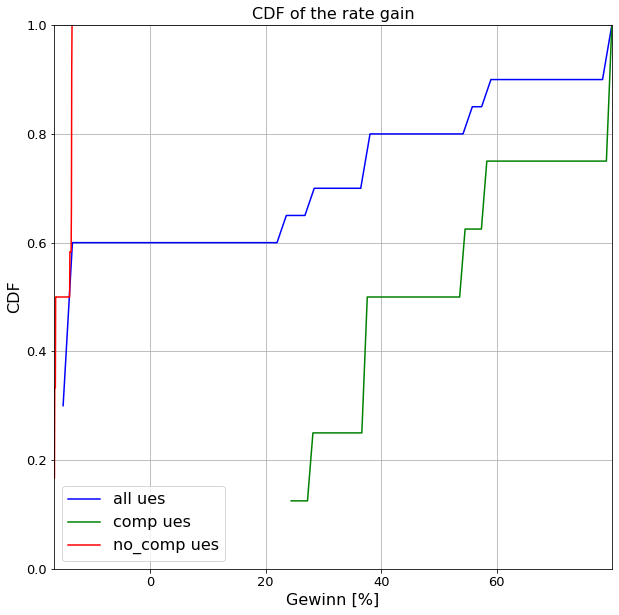

In [92]:
sh.cdf_3(x,'all ues','blue',y,'comp ues','green',z,'no_comp ues','red','CDF of the rate gain',min(liste),max(liste),'Gewinn [%]',60)

In [95]:
load1_l=np.array([])
load2_l=np.array([])
speicher={}
k=4
metric=[0,1]
prb_number_comp=eds.calculate_prb_number2(ue_all,max_prb)+1
prb_number_normal=max_prb-prb_number_comp
env=simpy.Environment()
sched1=eds.sched_inst(env)
sched2=eds.sched_inst(env)
sched3=eds.sched_inst(env)
sched_l=[sched1,sched2]
    

ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster,ue_nr)
    
env=simpy.Environment()
    #Start processes

SCHEDULE_T=2 #Clock des Schedulers 
for i in cluster:
    ue_list=ue_dict_red2[i]
    for j in ue_list:
        env.process(j.best_effort_stat(env,k))

ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
for i in cluster:
    ue_list=ue_dict_red2[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp

env.process(sched3.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    sched=sched_l[counter]
    env.process(sched.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
    counter=counter+1
timer=4000
env.run(until=timer)
liste=np.array([])
    
av=0
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
av=av/(ue_nr*2)
speicher.update({k:liste})
    
rem1=0
req1=0
load1=0
rem2=0
req2=0
load2=0
ind=int(timer/2-2)
for i in np.arange(100,ind):
    rem1+=sched1.rem_prb[ind]
    req1+=sched1.rem_req[ind]
    load1+=(sched1.rem_req[ind]+(max_prb-sched1.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
    rem2+=sched2.rem_prb[ind]
    req2+=sched2.rem_req[ind]
    load2+=(sched2.rem_req[ind]+(max_prb-sched2.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
load1_l=np.append(load1_l,load1/len(np.arange(100,ind)))
load2_l=np.append(load2_l,load2/len(np.arange(100,ind)))
    

C:\Users\Caroline Zoll\EDS\eds.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


In [ ]:
m=0
for i in ue_all[0:10]:
    m+=i.mR2/i.mR
m=((m/10)-1)*100

m2=0
for i in ue_all[10:20]:
    m2+=i.mR2/i.mR
m2=((m2/10)-1)*100

print('gain cell1:',m)
print('gain cell2:',m2)

In [ ]:
m=0
for i in ue_all[0:10]:
    m+=i.mR
m2=0
for i in ue_all[0:10]:
    m2+=i.mR2
print('av. mean rate cell 1')
print('no comp:',m/10)
print('comp:',m2/10)
m=0
for i in ue_all[10:20]:
    m+=i.mR
m2=0
for i in ue_all[10:20]:
    m2+=i.mR2 
print('av. mean rate cell 2')
print('no comp:', m/10)
print('comp:',m2/10)

In [ ]:
x=np.array([])
y=np.array([])
z=np.array([])
for i in ue_all:
    if(i.comp==0):
        z=np.append(z,i.mR2/i.mR)
    if(i.comp==1):
        y=np.append(y,i.mR2/i.mR)
    x=np.append(x,i.mR2/i.mR)
x=(x-1)*100
y=(y-1)*100    
z=(z-1)*100

In [ ]:
sh.cdf_3(x,'all ues','blue',y,'comp ues','green',z,'no_comp ues','red','CDF of the rate gain',min(liste),max(liste),'Gewinn [%]',60)

In [ ]:
m=0
for i in ue_all[0:10]:
    m+=i.mR
m2=0
for i in ue_all[0:10]:
    m2+=i.mR2
print('av. mean rate cell 1')
print('no comp:',m/10)
print('comp:',m2/10)
m=0
for i in ue_all[10:20]:
    m+=i.mR
m2=0
for i in ue_all[10:20]:
    m2+=i.mR2 
print('av. mean rate cell 2')
print('no comp:', m/10)
print('comp:',m2/10)

### Graph Visualization

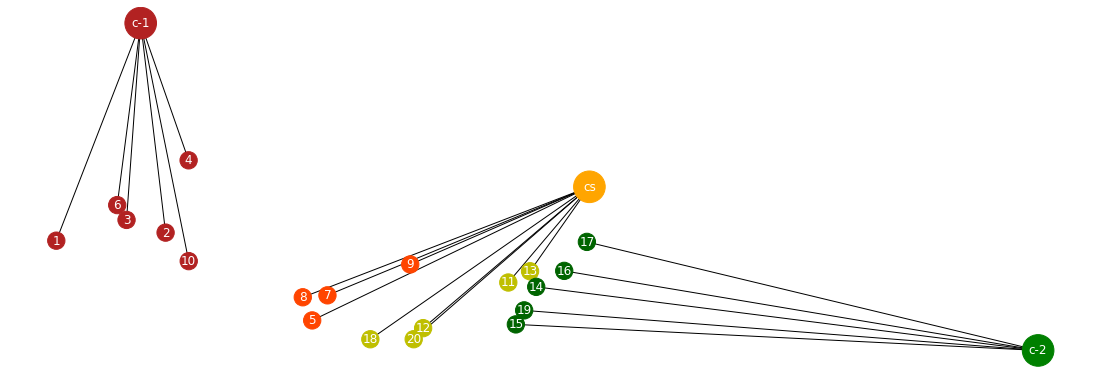

In [96]:
import plotly.graph_objects as go
import networkx as nx

df2 = pd.read_json("Prepro/cell_data.txt")
d={}
for i in df2.index:
    c=df2.loc[i]['cell']
    d.update({c['pci']:df2.loc[i]['pos']})
    
BS_pos=np.array([])
for i in cluster:
    BS_pos=np.append(BS_pos,d[i])

G=nx.Graph()

x=np.arange(1,ue_nr*2)
G.add_node('cs')
G.add_node('c-1')
G.add_node('c-2')

loc_dic={}
loc_dic.update({'cs':[(BS_pos[1]+BS_pos[3])/2,(BS_pos[0]+BS_pos[2])/2]})
loc_dic.update({'c-1':[BS_pos[1],BS_pos[0]]}) 
loc_dic.update({'c-2':[BS_pos[3],BS_pos[2]]})     
counter=1
for i in ue_all:
    loc_dic.update({counter:[i.y,i.x]})
    counter+=1

G.add_nodes_from(x)

n_c=np.array(['orange','firebrick','green'])
counter=1
for i in ue_all:
    #loc_dic.update({counter:[i.x,i.y]})
    if(i.comp==1):
        G.add_edge(counter,'cs')
        if(i.cell1==cluster[0]):
            n_c=np.append(n_c,'orangered')
        elif(i.cell1==cluster[1]):
            n_c=np.append(n_c,'y')
    else:
        if(i.cell1==cluster[0]):
            G.add_edge(counter,'c-1')
            n_c=np.append(n_c,'firebrick')
        elif(i.cell1==cluster[1]):
            G.add_edge(counter,'c-2')
            n_c=np.append(n_c,'darkgreen')
    counter+=1
            
n_s=np.ones(ue_nr*2+3)*300
n_s[0:3]=1000

plt.figure(3,figsize=(15,5)) 
nx.draw(G,pos=loc_dic,with_labels=True,node_color=n_c,font_color='white',node_size=n_s)
plt.draw()
plt.show()